In [358]:
import pandas as pd
import re # re.search etc. regular expressions

Create the Reference Table:
Create a DataFrame that defines your categories, subcategories, and corresponding descriptions.

In [359]:
# Reference table for categories and subcategories
# ???? CENTER FOR INTUITIVE P WARREN OH
# ???? BEACHWOOD PLACE, OH-HC BEACHWOOD OH
categories_data = {
    # INCOME TAXES FEES ETC EXCLUDE PAYMENTS
    'INCOME': {
        'Anita Income': ['ZELLE DEP ANITA'],
        'Fidelity Transfer': ['FID '],
        'KeyBank Cash-Back': ['KEY REWARDS', 'GIFT FROM KEY BANK']
    },
    'TAXES': {
        # 'CHECK # 746', 'CHECK # 747' 2024 tax due
        'Taxes': ['TAXREFUND', ' IRS ', 'TAX REF', 'RITA', 'CHECK # 746', 'CHECK # 747']
    },
    'FEES': {
        'Transaction Fees': ['TRANSACTION FEE']
    },
    'EXCLUDE': {
        'Visa Payment': ['INTERNET TRF TO CCA'],
        'Visa Payment Received': ['PAYMENT RECEIVED']
    },
    # PRESUMABLY CHECKING ACCT
    'HOUSING': {
        'Mortgage': ['WFHM'],
        # ATT*BILL - Anita's phone bill ????
        # CWD - CLEVELAND WATER DISTRICT
        'Bills n Utilities': ['VERIZON', 'VZWRLSS', 'DOMINION', 'FIRST ENERGY', 'NORTHEAST OHIO', 'CLEVELAND HEIGHTS', 'ENBRIDGE GAS', \
                              'ATT ', 'ATT*BILL', 'NEORSD', 'CWD']
    },
    'INSURANCE': {
        'Medical Insurance': ['MEDICARE', 'VSP', 'UNITEDHEALTHCARE', 'ROCKWELL', 'AARP HEALTH', 'DELTA DENTAL'],
        'Car Insurance': ['LIBERTY MUTUAL']
    },
    'HEALTHCARE': {
         # CLEVELAND KIDNEY & HYP - tomek's kidney USG ?
        'Medical and Dental': ['PEDIATRICS', 'CLEVELAND CLINIC', 'METROHEALTH', 'WESTERN RESERVE PERIO', 'HILLCREST ', 'CLEVELAND KIDNEY ',\
                               'SPRY SENIOR', 'ETNA CLEVELAND', 'HEIGHTS DENTAL '],
        'Pharmacy': ['CVS', 'WALGREENS']
    },
    'EDUCATION': {
        'College Tuition': ['SMARTPAYCIA', 'CASHNET', 'CAMPUS CIA', 'BURREN', 'COLLEGE'],
        'Art Supplies': ['UTRECHT', ' ART ']
    },
    'PROFESSIONAL': {
        # CENTER FOR INTUITIVE P WARREN OH - ???
        'Professional Fees': ['LICENSURE', 'LICENSE', 'CENTER FOR INTUITIVE'],
        'AI API charges': ['OPENAI '],
        # PAUKENLEGAL - legal and estate planning documents 
        'Professional Services': ['PAUKENLEGAL'],
        'Liability Insurance': ['CPH LIABILITY']
    },
    # PRESUMABLY CREDIT CARD
    'TRANSPORTATION': {
        'Car Registration' : ['BUREAU MOTOR VE'] ,
        'Gas': ['SUNOCO', 'BP', 'SHELL', 'MARATHON', 'CIRCLE K', 'SHEETZ', 'GAS', 'SPEEDWAY'],
        # EZ PASS REAL TIME ????????? - payment for missed toll in Onio
        'Parking and Tolls': ['EZ PASS REAL TIME', 'GARAG ', 'PARKING CLEVELAND'],
        'Car Maintenance': ['REPAIR', 'AUTO', 'AUTO BODY', 'QUALITY AUTO']
    },
    'FOOD': {
        'Groceries': ['GROCERY', 'HEINEN', 'DAVE', 'WHOLE', 'SODA', 'TRADE'],
        'Dining Out': ['TAVERN', 'TOMMYS', 'CAFE', 'WASABI', 'PACIFIC', 'ANATOLIA', 'BATUQUI', 'PHO', 'LAKE HOUSE', 'DEWEY',\
                        'MAROTTA ', 'BANANA', 'BANGKOK', 'HIBACHI', 'BRASSICA', 'RESTAUR', 'BUFFALO', 'COZUMEL', 'FIRST WATCH',\
                            'PARADISE BIRYANI', 'CARIBOU COFFEE', 'STONE OVEN', 'SEOUL GARDEN ', 'YOURS TRULY', 'LOCKKEEPERS', \
                                'MO MO`S KEBAB', 'BAKE ME A WISH','ONE POT CLEVELAND' ],
        'Fast Food': ['LEFTY', 'SHAKE SHACK', 'SHAKESHACK', 'WENDY', 'BUDDA', 'CILANTRO', 'PANERA', 'CHIPOTLE', 'BIBIBOP', 'ROGERS', 'PIADA',\
                      'ZINA', 'SUBSHOPPE', 'NATURES OASIS', 'LOTUS EXPRESS', 'BRUEGGERS '],
        'World Food': ['KRAKOW', 'NIPA HUT', 'YELESEYEVSKY'],
        'Why DOORDASH?': ['DOORDASH']
    },
    'SELFCARE & WELLBEING': {
        'Aikido n Yoga': ['CHECK', ' YOGA'], 
        'Beauty n Supplies': ['LADIES', 'BATH', 'SALLY BEAUTY', 'AVEDA', 'LUSH BEACHWOOD', 'AIKIKAI', 'AIKIDO', 'ATMA', \
                              'PADDLE', 'OFFICEMAX'],
        'Sound Bath': ['PAYPAL INST'] # ????? Lyndsay McAdams ?
    },
    'HOME & GARDEN': {
        'House Maintenance': [re.compile(r'HOME DEPOT.*CLEVELAND'), re.compile(r'HOME DEPOT.*OH$')],
        'Furnishing': ['WORLD', 'REFURNISHING', 'KOALA', 'WAYFAIR'],
        'Garden': ['BREMEC', 'LANDSCAPE', 'STUMP', 'NATURE CENTER']
    },
    'SUBSCRIPTIONS': {
        'Subscription': ['SPOTIFY', 'APPLE', 'NETFLIX', 'AUDIBLE', 'PEACOCK', 'WALL', 'BITDEFENDER', 'MICROSOFT', 'HULU', 'NYTIMES', 'IDEASTREAM', 'WSJ']
    },
    'SHOPPING': {
        'Amazon': ['AMAZON', 'AMZN'],
        'Department Store': ['TARGET', 'MACY'],
        # BEACHWOOD PLACE, OH-HC BEACHWOOD OH =? Ann Taylor store in beachwood place
        'Clothes': ['REI', 'NORDSTROM', 'DICK', 'DSW', 'AVALON', 'MARSHALLS', 'ANN TAYLOR', 'AMERICAN EAGLE', \
                    'FOOTWEAR', 'H&M ', 'OLD NAVY ', 'VICTORIA\'S SECRET'],
        'Kindle n Books': ['KINDLE', 'AUDIOTEKA', 'LOGANBERRY', 'MAC\'S', 'EMPIK'],
        # SERIF.COMBILL MINNETONKA MN = AFFINITY GRAPHICS SOFTWARE
        # SIMON HAYNES T AIAT PAYPAL = SpaceJock Writing software
        'Software n Accessories': ['SIMON HAYNES', 'ALISTORE', 'GOOGLE', 'FLIXEASY', 'CLIP STUDIO', 'ALIEXPRESS', 'SERIF.COMBILL MINNETONKA MN'],
        # LOTUS FLOWER LLC = flowers to Poland
        # PROGIFT 347-748-1833 FL - flowers to Poland for mom;s 90th birtdhay
        # WORDPRESS = wordpress.com Jacek's website and domain
        # STUFFEDANIMALSHOP, GETSHIRTZ, BERKSHIRE BLANKET - Erin and Gabe's babyshower
        'Gifts': ['FIDDLEHEAD', 'PASSPORT', 'DIAMONDS FLOWERS', 'BUNDT', 'ALL CITY CANDY', 'LOTUS FLOWER LLC', 'PINKBLUSHMATERNIT',\
                  'LITTLE ROOM ', 'CRAFT COLLECTIVE', 'PANDORA', 'WORDPRESS ', 'STUFFEDANIMALSHOP', 'GETSHIRTZ', 'FLOWERS.COM', \
                    'PROGIFT', 'BERKSHIRE BLANKET'],
        # THE CHILDRENS PLACE 42 BEACHWOOD OH 
        # THECHILDRENSPLACE.COM SECAUCUS NJ
        'Kids Toys': ['PLAYMATTERS', 'DISNEYSTORE', 'CHILDRENS PLACE', 'THECHILDRENSPLACE.COM' ],
        # OHIO STATE PARKS - kayak registration
        'Cycling n Paddling' : ['BIKES', 'IROCKER', 'OHIO STATE PARKS']
    },
    'PETS': {
        'Cat Food n Supplies': ['PET', 'CHEWY', 'HOLLYWOOD FEED', 'JACKSON GALAXY'],
        'Cat Health': ['VETERINARY']
    },
    # ENTERTAINMENT n GIFTS
            # MOVIES THEATER COMPUTER GAMES BIRTHDAY CAKES BDAY DINNERS ETC
            # NOTE: CLEVELAND INSTITUTE OF CLEVELAND ==== CIA CINEMATEQUE
            # MUSEUM ===== includes THE CHILDRENS MUSEUM O CLEVELAND OH 
            # GREATER CLEVELAND AQUA ==== CLEVELAND AQUARIUM
            # MANGO MANGO DESSE CLEVELAND ===== mango mango dessert Sof's birthday with Felix
            # DIAMONDS FLOWERS ========= flower shop Coventry
    'ENTERTAINMENT': {
        # METROPARKS FARMPA KIRTLAND - Farm Park Kirtland w Kiddos
        'Fun Out': ['CLEVELAND MUSEUM OF AR', 'CHILDRENS MUSEUM ', 'GREATER CLEVELAND AQUA', 'METROPARKS FARMPA KIRTLAND', \
                        'MITCHELL', 'SWEET FIX', 'MANGO MANGO DESSE', 'ON THE RISE', 'RISING STAR COFFEE', \
                            'STARBUCKS', 'MICHAELS', 'UPTOWN MART', 'ELLIE-MAYS', '6 FLAVORS INDIAN', 'LUXE KITCHEN', \
                                'KOKO BAKERY' ],
        'Movies n Theater': ['VUDU', 'FANDANGO', 'DOBAMA','THEAT', 'CLEVELAND PUBLIC', 'CLEVELAND INSTITUTE OF CLEVELAND',\
                                   'MOVIE', 'PRIME VIDEO', 'BORDERLIGHT', 'CINEMA'],
        'Music n Games': ['STEAMGAMES', 'BANDCAMP'],
        # Cleveland Museum Cleveland OH - Cleveland Museum of Art membership
        'Memberships': ['Cleveland Museum Cleveland', 'LITCLEVELAND']
    },
    # PY *PCRF LOS ANGELES CA - Palestine children relief fund ??? 
    'MISCELLANEOUS': {
        # CUIMC DIY FUNDRAISING Columbia University Irving Medical Center - Craig's fund 
        'Political Donations': ['ACTBLUE', 'CUIMC '],
        'ATM Wthdrw n Dpsit' : ['ATM '],
        'Vending Machines' : ['VENDING ', 'PEPSIVEN'],
        'Parcels' : ['USPS ']
    },
    # EXCEPTIONS - PROCESS LAST
    'VACATIONS & TRAVEL': {
        # HNDISCOVER ST728 CLEVELAND OH = Hopkins airport  
        # Espresso House 7187 Kastrup DNK = Copenhagen Airport
        'Air Travel': ['LOT ', 'AMERICAN', 'EXPEDIA', 'SAS ', 'EAT AND GO JAMAICA', ' Kastrup', 'HUDSONNEWS ', 'HUDSON',\
                       'HNDISCOVER', 'JFK ', 'MIDTOWN BISTRO', 'TST* ', 'CURRITO '],
        'Visiting Grandma Ela': ['PLUSKI', 'OLSZTYN', 'WARSZAWA', re.compile(r' POL$'), re.compile(r' CHICAGO IL$')],
        'Vacation SC': ['FOLLY', 'VIATORTRIPADVISOR', 'VACASA', 'VRBO', re.compile(r' SC$'), re.compile(r' NC$'), re.compile(r' WV$')],
        'Visiting Wanda': [re.compile(r' VA$'), re.compile(r' GA$'), re.compile(r' MD$')],
        'Visiting Eva': ['PITTSBURGH', 'TURNPIKE', re.compile(r' PA$')]
    },
}

In [360]:
# Define custom display order and colors for your categories 
categories_order_and_colors = [
    ('INCOME', '#D3D3D3'),  # Light Gray
    ('HOUSING', '#2ca02c'),  # Green
    ('INSURANCE', '#FFD700'),  # Gold
    ('HEALTHCARE', '#FFFF00'),  # Yellow
    ('FOOD', '#1f77b4'),  # Blue
    ('SUBSCRIPTIONS', '#E6E6FA'),  # Lavender
    ('TRANSPORTATION', '#708090'),  # Slate Gray
    ('SELFCARE & WELLBEING', '#FFC0CB'),  # Pink
    ('SHOPPING', '#FF6666'),  # Light Red
    ('HOME & GARDEN', '#FFA500'),  # Orange
    ('PETS', '#8A2BE2'),  # Violet
    ('ENTERTAINMENT', '#FF00FF'),  # Magenta
    ('PROFESSIONAL', '#FF8C00'),  # Dark Orange
    ('TAXES', '#696969'),  # Dim Gray
    ('EDUCATION', '#800080'),  # Purple
    ('VACATIONS & TRAVEL', '#8B0000'),  # Dark Red
    ('FEES', '#FF0000'),  # Red
    ('MISCELLANEOUS', '#FF0000'),  # Red
    ('UNCATEGORIZED', '#000000')  # Black
]

# Unzip the array to get the display order and colors as separate lists
display_order, colors = zip(*categories_order_and_colors)

Verify Integrity of categories definition

In [361]:
# Find duplicates and substrings in categories, subcategories, and keywords   
def find_all_duplicates_and_substrings(data):
    subcategory_seen = set()
    keyword_seen = set()
    duplicate_subcategories = set()
    duplicate_keywords = set()
    substring_subcategories = set()
    substring_keywords = set()

    # Collect all subcategories and keywords first
    all_subcategories = []
    all_keywords = []

    for category, subcategories in data.items():
        for subcategory, keywords in subcategories.items():
            all_subcategories.append(subcategory)
            for keyword in keywords:
                if isinstance(keyword, re.Pattern):
                    all_keywords.append(keyword.pattern)
                else:
                    all_keywords.append(keyword)

    # Check for duplicate and substring subcategories
    for i, subcategory in enumerate(all_subcategories):
        for j, other_subcategory in enumerate(all_subcategories):
            if i != j:
                # Check for duplicates
                if subcategory == other_subcategory:
                    duplicate_subcategories.add(subcategory)
                # Check for substrings
                if subcategory in other_subcategory or other_subcategory in subcategory:
                    substring_subcategories.add((subcategory, other_subcategory))

    # Check for duplicate and substring keywords
    for i, keyword in enumerate(all_keywords):
        for j, other_keyword in enumerate(all_keywords):
            if i != j:
                # Check for duplicates
                if keyword == other_keyword:
                    duplicate_keywords.add(keyword)
                # Check for substrings
                if keyword in other_keyword or other_keyword in keyword:
                    substring_keywords.add((keyword, other_keyword))

    return duplicate_subcategories, duplicate_keywords, substring_subcategories, substring_keywords

In [362]:
# Find duplicates and substrings in categories_data
duplicate_subcategories, duplicate_keywords, substring_subcategories, substring_keywords = find_all_duplicates_and_substrings(categories_data)

# Print the results
print("Duplicate Subcategories:")
print(duplicate_subcategories if duplicate_subcategories else "None")

print("\nDuplicate Keywords:")
print(duplicate_keywords if duplicate_keywords else "None")

print("\nSubstring Subcategories:")
print(substring_subcategories if substring_subcategories else "None")

print("\nSubstring Keywords:")
print(substring_keywords if substring_keywords else "None")

Duplicate Subcategories:
None

Duplicate Keywords:
None

Substring Subcategories:
{('Visa Payment Received', 'Visa Payment'), ('Visa Payment', 'Visa Payment Received')}

Substring Keywords:
{('AMERICAN EAGLE', 'AMERICAN'), ('CHECK # 747', 'CHECK'), ('AUTO', 'QUALITY AUTO'), ('CHECK', 'CHECK # 747'), ('CHECK # 746', 'CHECK'), ('HUDSONNEWS ', 'HUDSON'), ('AUTO BODY', 'AUTO'), ('HUDSON', 'HUDSONNEWS '), ('AMERICAN', 'AMERICAN EAGLE'), ('QUALITY AUTO', 'AUTO'), ('GAS', 'ENBRIDGE GAS'), ('AUTO', 'AUTO BODY'), ('ENBRIDGE GAS', 'GAS'), ('CHECK', 'CHECK # 746')}


In [363]:
# Convert the hierarchical dictionary into a DataFrame for easier processing
categories_list = []
for category, subcategories in categories_data.items():
    for subcategory, keywords in subcategories.items():
        categories_list.append({'Category': category, 'Subcategory': subcategory, 'DescriptionKeywords': keywords})

categories_df = pd.DataFrame(categories_list)

# print(categories_list)
# print(categories_df)

Function to Categorize Transactions:
Create a function that uses the reference table to categorize transactions based on the description.

In [364]:
# Using iterrows() to iterate over rows
# for index, row in categories_df.iterrows():
#     print(f"Index: {index}")
#     print(f"Row: {row}")

In [ ]:
# Categorize all transactions to category and subcategory based on the description keyword
# NOTE - this is case-sensitive on keyword side
def categorize_transaction_lowercase(description, categories_df):
    description_upper = description.upper() 
    for index, row in categories_df.iterrows():
        for keyword in row['DescriptionKeywords']:
            if isinstance(keyword, str) and keyword in description_upper:
                return row['Category'], row['Subcategory']
            elif isinstance(keyword, re.Pattern) and keyword.search(description_upper):
                return row['Category'], row['Subcategory']
    return 'UNCATEGORIZED', 'Uncategorized'

In [ ]:
# Categorize all transactions to category and subcategory based on the description keyword
# NOTE - this is not case-sensitive on both sides
def categorize_transaction(description, categories_df):
    description_upper = description.upper()  # Convert description to uppercase

    for index, row in categories_df.iterrows():
        for keyword in row['DescriptionKeywords']:
            if isinstance(keyword, str):
                keyword_upper = keyword.upper()  # Convert keyword to uppercase
                if keyword_upper in description_upper:
                    return row['Category'], row['Subcategory']
            elif isinstance(keyword, re.Pattern):
                # Modify regex pattern to be case-insensitive
                if keyword.search(description_upper):
                    return row['Category'], row['Subcategory']

    return 'UNCATEGORIZED', 'Uncategorized'

In [367]:
# Append new bank record file to the current dataframe 
def load_and_append(file_path, current_df):
    """
    Load an Excell file and append its content to the current DataFrame.

    Parameters:
    - file_path: str, the path to the new file
    - current_df: pd.DataFrame, the current DataFrame

    Returns:
    - pd.DataFrame, the updated DataFrame with the new data appended
    """
    # Load the new DataFrame from the Excell file
    new_df = pd.read_excel(file_path)

    # Append the new DataFrame to the current DataFrame
    updated_df = pd.concat([current_df, new_df], ignore_index=True)

    return updated_df

In [368]:
# Load a pair of bank record files for a particular year and month 
# NOTE - uses standard file naming convention for checking and credit card record  
def load_expenses(year_month):
    # Load the CSV files with credit card and checking card records
    creditcard_filename = year_month + '-A&T-CCard.xlsx'
    checking_filename = year_month + '-A&T-CheckingAcct.xlsx'

    df_credit = pd.read_excel(creditcard_filename)
    df_checking = pd.read_excel(checking_filename)
    print(df_credit.head())
    print(df_checking.head())

    # Check the first few rows to understand the structure of your data.
    df = pd.concat([df_checking, df_credit], ignore_index=True)
    df.head()
    return df

### Main load expense record segment

In [369]:
# set pandas display options to show all columns
pd.set_option("display.width", 1000)
pd.set_option("display.max_columns", None)  # Show all columns

In [370]:
# YEAR 2024 summary: months_to_process = ['2024-01','2024-02','2024-03','2024-04','2024-05','2024-06','2024-07','2024-08', '2024-09','2024-10','2024-11','2024-12']
# YEAR 2025 so far: 
months_to_process =['2025-01', '2025-02', '2025-03', '2025-04']
# CURRENT month: months_to_process =['2025-01']

# Initialize empty dataframe
input_df  = pd.DataFrame()

# Load a month-worth saving and credit record and append to the current dataframe
for month in months_to_process : 
    df_month = load_expenses(month)
    input_df = pd.concat([input_df, df_month], ignore_index=True)

# Format the date / range of dates to the output filenames
# - extract the year from the first month in the list
year = months_to_process[0][:4]
# - extract the months from each entry in the list
months = [month[5:] for month in months_to_process]
# - concatenate the year and the months together in the desired format
# - join the list of months into a single string
months_string = "-".join(months)
# - create the final result string
result_string = f"{year}-{months_string}"
output_filename_monthly_expenses = result_string + '-A&T-EXPENSES.xlsx'
output_filename_summary_by_cats = result_string + '-A&T-SUMMARY-BY-CATS.csv'
output_filename_summary_w_subcats = result_string + '-A&T-SUMMARY-W-SUBCATS.csv'
output_filename_categorized_expenses = result_string + '-A&T-CATEGORIZED.csv'
output_filename_expenses_by_cats = result_string + '-A&T-EXPENSES-BY-CATS.csv'

print(output_filename_categorized_expenses)

        Date  Amount                             Description  Ref.#
0 2025-01-30  -36.56  DAVE'S SUPERMARKET #22 CLEVELAND HTSOH   6089
1 2025-01-30  -12.95                   SPOTIFY 8777781161 NY   4123
2 2025-01-30   -5.00    IDEASTREAM PUBLIC MEDI 2169166100 OH   4123
3 2025-01-29  -12.16         WALGREENS #4130 CLEVELAND HEIOH   6089
4 2025-01-28  208.39     WF *WAYFAIR4356136972 8662638325 MA   4123
        Date   Amount                                Description  Ref.#
0 2025-01-31  -131.32                             NEORSD WEB PAY    NaN
1 2025-01-31   -56.08      ENBRIDGE GAS OHIBILLPAY 5500044461403    NaN
2 2025-01-31 -6133.73  INTERNET TRF TO CCA XXXXXXXXXXXX4123 0101    NaN
3 2025-01-29 -1487.31          BILL PAY:WFHM 708 057939 PB51TFEM    NaN
4 2025-01-28  -211.51                   VERIZON WIRELESSPAYMENTS    NaN
        Date  Amount                             Description  Ref.#
0 2025-02-27  -46.81               PIADA - 9 SOUTH EUCLID OH   6089
1 2025-02-28  -10.36  AM

## Categorize all transactions

In [371]:
# Apply the categorize_transaction function to categorize transactions
categorized_expenses_df = input_df
# add two columns to the dataframe
# df['Description'].apply(lambda x: pd.Series(categorize_transaction(x, categories_df))):
#  - this applies the categorize_transaction function to each element in the 'Description' column.
#  - the function categorize_transaction is assumed to return a tuple or a list with two elements: the category and the subcategory.
# pd.Series(...):
#  - converts the output of categorize_transaction (which is a tuple or list) into a pandas Series. This is done for each 'Description' value.
# df[['Category', 'Subcategory']]:
#  - ssigns the resulting Series to the 'Category' and 'Subcategory' columns in the DataFrame df.
categorized_expenses_df[['Category', 'Subcategory']] = \
    input_df['Description'].apply(lambda x: pd.Series(categorize_transaction(x, categories_df)))


In [372]:
def format_and_save_categorized_expenses(input_df, categories_df, output_filename_categorized_expenses):    

    # Sample input DataFrame (assuming the categorization is already done)
    categorized_expenses_df = input_df.copy()
    categorized_expenses_df[['Category', 'Subcategory']] = \
        categorized_expenses_df['Description'].apply(lambda x: pd.Series(categorize_transaction(x, categories_df)))

    # Sort DataFrame based on display order
    categorized_expenses_df['Category'] = pd.Categorical(
        categorized_expenses_df['Category'], categories=display_order, ordered=True
    )
    categorized_expenses_df = categorized_expenses_df.sort_values(by=["Category", "Subcategory"])

    # Reorder columns
    categorized_expenses_df = categorized_expenses_df[['Category', 'Subcategory', 'Description', 'Amount', 'Date']]

    print(categorized_expenses_df)
    # Save to CSV
    categorized_expenses_df.to_csv(output_filename_categorized_expenses, index=False)

format_and_save_categorized_expenses(input_df, categories_df, output_filename_expenses_by_cats)

          Category            Subcategory                                Description   Amount       Date
9           INCOME           Anita Income        ZELLE DEP ANITA S DACANAY GB81LFZNC  2500.00 2025-01-17
17          INCOME           Anita Income        ZELLE DEP ANITA S DACANAY CBH1LFLHC  3000.00 2025-01-02
105         INCOME           Anita Income        ZELLE DEP ANITA S DACANAY JBT1955WC  3500.00 2025-02-26
112         INCOME           Anita Income        ZELLE DEP ANITA S DACANAY 4BU1P5M7C  2500.00 2025-02-14
118         INCOME           Anita Income        ZELLE DEP ANITA S DACANAY EBK175KRC  2000.00 2025-02-03
..             ...                    ...                                        ...      ...        ...
436  MISCELLANEOUS    Political Donations        CUIMC DIY FUNDRAISING 2128549685 NY   -50.00 2025-04-02
2              NaN           Visa Payment  INTERNET TRF TO CCA XXXXXXXXXXXX4123 0101 -6133.73 2025-01-31
100            NaN           Visa Payment  INTERNET TRF

In [373]:

# Filter out rows with 'EXCLUDE' category
filtered_expenses_df = categorized_expenses_df[categorized_expenses_df['Category'] != 'EXCLUDE']

# Convert the 'Category' column to a categorical type with the custom order
# and reorder the columns in the DataFrame according to the desired order
ordered_expenses_df = filtered_expenses_df
ordered_expenses_df['Category'] = pd.Categorical(ordered_expenses_df['Category'], categories=display_order, ordered=True)
# The following sort_values method will respect this custom order when sorting the 'Category' column. 
# So, the rows in the sorted_df DataFrame will be sorted according to the custom category order defined in display_order, 
# followed by the 'Subcategory' column
ordered_sorted_expenses_df = ordered_expenses_df.sort_values(by=['Category', 'Subcategory'])

# Print the categorized DataFrame
print(ordered_sorted_expenses_df)
# Save it to a csv file
ordered_sorted_expenses_df.to_csv(output_filename_categorized_expenses)

          Date  Amount                               Description   Ref.#       Category          Subcategory
9   2025-01-17  2500.0       ZELLE DEP ANITA S DACANAY GB81LFZNC     NaN         INCOME         Anita Income
17  2025-01-02  3000.0       ZELLE DEP ANITA S DACANAY CBH1LFLHC     NaN         INCOME         Anita Income
105 2025-02-26  3500.0       ZELLE DEP ANITA S DACANAY JBT1955WC     NaN         INCOME         Anita Income
112 2025-02-14  2500.0       ZELLE DEP ANITA S DACANAY 4BU1P5M7C     NaN         INCOME         Anita Income
118 2025-02-03  2000.0       ZELLE DEP ANITA S DACANAY EBK175KRC     NaN         INCOME         Anita Income
..         ...     ...                                       ...     ...            ...                  ...
117 2025-02-03  -250.0  ATM KEY 2185 WARENSVLE CTR UNIVERSITY OH     NaN  MISCELLANEOUS   ATM Wthdrw n Dpsit
238 2025-03-22   -14.6        USPS KIOSK 3816559551 CLEVELAND OH  6089.0  MISCELLANEOUS              Parcels
246 2025-03-22   -1

/tmp/ipykernel_3330/3518985550.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordered_expenses_df['Category'] = pd.Categorical(ordered_expenses_df['Category'], categories=display_order, ordered=True)


### Create Categories only Monthly Summaries

In [374]:
# Convert the date column to datetime:
# Ensure the date column is in datetime format.
ordered_sorted_expenses_df['Date'] = pd.to_datetime(ordered_sorted_expenses_df['Date'])

# Group by month - extract the month and year from the date column and group the data by these values.
ordered_sorted_expenses_df['YearMonth'] = ordered_sorted_expenses_df['Date'].dt.to_period('M')

# Summarize expenses by category for each month
monthly_expenses = ordered_sorted_expenses_df.groupby(['YearMonth', 'Category'])['Amount'].sum().unstack().fillna(0)

# Transpose the DataFrame to print in rows of expenses by columns of months 
monthly_expenses_summary = monthly_expenses.T
# Reset index to make 'Category' a column
monthly_expenses_summary = monthly_expenses_summary.reset_index()
# Rename columns for clarity
monthly_expenses_summary.columns.name = None

# Print the final DataFrame
print(monthly_expenses_summary)
monthly_expenses_summary.to_csv(output_filename_summary_by_cats, index=False)

                Category   2025-01   2025-02   2025-03  2025-04
0                 INCOME  11500.00  17000.00  16750.00  5000.00
1                HOUSING  -2314.58  -2549.48  -3315.38 -2319.69
2              INSURANCE  -1159.85  -2955.95  -1159.85 -1159.85
3             HEALTHCARE  -1177.22  -1326.04   -619.53  -362.81
4                   FOOD  -1910.88  -1782.09  -2001.79 -2217.75
5          SUBSCRIPTIONS   -132.34    -96.40   -321.25  -126.83
6         TRANSPORTATION    -32.10   -116.70   -137.80  -503.10
7   SELFCARE & WELLBEING   -275.00   -415.08   -338.64  -364.66
8               SHOPPING   -496.56  -1135.14   -649.42 -1169.07
9          HOME & GARDEN   -698.02  -2952.76    -59.27  -270.89
10                  PETS    -92.60   -533.62   -100.48  -693.04
11         ENTERTAINMENT   -149.09   -169.00    -93.07  -173.15
12          PROFESSIONAL   -448.80     -5.00      0.00  -350.00
13                 TAXES      0.00      0.00  -1476.00 -5209.00
14             EDUCATION      0.00    -4

/tmp/ipykernel_3330/1145890876.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_expenses = ordered_sorted_expenses_df.groupby(['YearMonth', 'Category'])['Amount'].sum().unstack().fillna(0)


### Create Monthly Summaries w Subcategories

In [375]:
# create a dictionary with the desired order of categories using display_order
desired_order_dict = {category: i for i, category in enumerate(display_order)}

# Assuming categorized_expenses_df is our DataFrame with categorized transactions

# Step 1: Add 'YearMonth' column (assuming 'Date' is in datetime format)
categorized_expenses_df['YearMonth'] = categorized_expenses_df['Date'].dt.to_period('M')

# Step 2: Group by 'Category', 'Subcategory', and 'YearMonth', and sum 'Amount'
grouped_df = categorized_expenses_df.groupby(['Category', 'Subcategory', 'YearMonth'])['Amount'].sum().reset_index()
print(grouped_df)

# Step 3: Pivot the table
pivot_table = grouped_df.pivot_table(index=['Category', 'Subcategory'], columns='YearMonth', values='Amount', fill_value=0)
print(pivot_table)

# Reset the index to flatten the DataFrame
pivot_table = pivot_table.reset_index()

# Step 4: Calculate the total for each category
category_totals = pivot_table.groupby('Category').sum().reset_index()
category_totals['Subcategory'] = '<<< TOTAL >>>'

# Step 5: Combine the pivot_table with the category totals
subcategories_w_totals_df = pd.concat([pivot_table, category_totals], ignore_index=True)

# Apply the custom order
subcategories_w_totals_df['CategoryOrder'] = subcategories_w_totals_df['Category'].map(desired_order_dict)

# Step 6: Sort by custom category order and subcategory
subcategories_w_totals_df = subcategories_w_totals_df.sort_values(by=['CategoryOrder', 'Subcategory']).reset_index(drop=True)

# Drop the 'CategoryOrder' column as it's no longer needed
subcategories_w_totals_df = subcategories_w_totals_df.drop(columns=['CategoryOrder'])

# Step 7: Leave the category column blank for subcategories
subcategories_w_totals_df.loc[subcategories_w_totals_df['Subcategory'] != '<<< TOTAL >>>', 'Category'] = subcategories_w_totals_df.loc[subcategories_w_totals_df['Subcategory'] != '<<< TOTAL >>>', 'Category'].mask(subcategories_w_totals_df['Category'].duplicated(), '')

# Print the final DataFrame
print(subcategories_w_totals_df)

# Save the final DataFrame to CSV
subcategories_w_totals_df.to_csv(output_filename_summary_w_subcats, index=False)


               Category           Subcategory YearMonth  Amount
0             EDUCATION          Art Supplies   2025-02  -45.18
1             EDUCATION          Art Supplies   2025-04  -12.00
2         ENTERTAINMENT               Fun Out   2025-02  -28.17
3         ENTERTAINMENT               Fun Out   2025-03  -10.23
4         ENTERTAINMENT               Fun Out   2025-04  -85.86
..                  ...                   ...       ...     ...
114      TRANSPORTATION     Parking and Tolls   2025-04  -50.50
115  VACATIONS & TRAVEL          Visiting Eva   2025-03  -23.71
116  VACATIONS & TRAVEL          Visiting Eva   2025-04 -610.84
117  VACATIONS & TRAVEL  Visiting Grandma Ela   2025-03   -7.00
118  VACATIONS & TRAVEL        Visiting Wanda   2025-03 -251.49

[119 rows x 4 columns]
YearMonth                                    2025-01  2025-02   2025-03  2025-04
Category             Subcategory                                                
EDUCATION            Art Supplies             

### Write output data to two sheets in an excell file

In [376]:
# Use ExcelWriter to write DataFrames to different sheets
with pd.ExcelWriter(output_filename_monthly_expenses, engine='xlsxwriter') as writer:
    subcategories_w_totals_df.to_excel(writer, sheet_name='Subcategories', index=False)
    monthly_expenses_summary.to_excel(writer, sheet_name='Categories', index=False)

Analyze and visualize the data:

You can now analyze the monthly expenses by category and create visualizations.

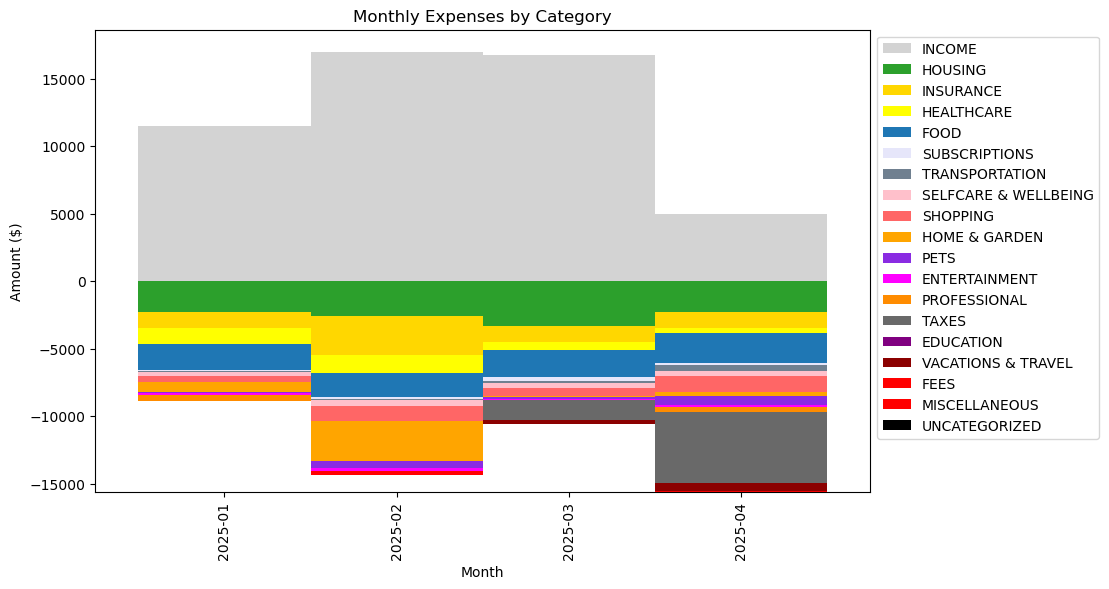

In [377]:
import matplotlib.pyplot as plt

# Reorder the columns in the DataFrame according to the desired order
monthly_expenses = monthly_expenses[list(display_order)]

# Plot monthly expenses by category
monthly_expenses.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors, width=1)
plt.title('Monthly Expenses by Category')
plt.xlabel('Month')
plt.ylabel('Amount ($)')

# Move the legend to the best location
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()
